# 6. Kaggle - Taxi Fare Prediction:

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df1=pd.read_csv('test1.csv')
df2=pd.read_csv('test1.csv')

In [3]:
df=pd.read_csv('train1.csv',nrows=2_00_000)



In [4]:
df1.shape

(9914, 7)

In [5]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
a=df['pickup_latitude']
b=df['dropoff_latitude']
c=df['pickup_longitude']
d=df['dropoff_longitude']
a[0]
e=df1['pickup_latitude']
f=df1['dropoff_latitude']
g=df1['pickup_longitude']
h=df1['dropoff_longitude']
e.shape

(9914,)

In [8]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))

    r = 6371

    return(c * r)

lat1 = a[0]
lat2 = b[0]
lon1 = c[0]
lon2 = d[0]
print(distance(lat1, lat2, lon1, lon2))

1.030763935049508


In [9]:
dist=[]
for i in range(len(a)):
    dist.append(distance(a[i],b[i],c[i],d[i]))

df['distance_in_km']=dist
df['distance_in_km']

0          1.030764
1          8.450134
2          1.389525
3          2.799270
4          1.999157
            ...    
199995     3.234267
199996     4.735418
199997     2.367682
199998     4.085196
199999    12.314094
Name: distance_in_km, Length: 200000, dtype: float64

In [10]:
dist1=[]
for j in range(len(e)):
    dist1.append(distance(e[j],f[j],g[j],h[j]))

df1['distance_in_km']=dist1
df1['distance_in_km']

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Name: distance_in_km, Length: 9914, dtype: float64

In [11]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
fare_amount,1.000000,0.009793,-0.008967,0.008768,-0.007940,0.013875,0.021238
pickup_longitude,0.009793,1.000000,-0.381366,0.723496,-0.931383,-0.000587,0.134607
pickup_latitude,-0.008967,-0.381366,1.000000,-0.640873,0.369560,0.000150,-0.100949
dropoff_longitude,0.008768,0.723496,-0.640873,1.000000,-0.752919,0.000569,0.135909
dropoff_latitude,-0.007940,-0.931383,0.369560,-0.752919,1.000000,-0.000865,-0.118853
passenger_count,0.013875,-0.000587,0.000150,0.000569,-0.000865,1.000000,0.000389
distance_in_km,0.021238,0.134607,-0.100949,0.135909,-0.118853,0.000389,1.000000


In [12]:
#Created new columns from existing datetime column
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])


In [13]:
data=[df,df1]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [14]:
df1.shape

(9914, 13)

In [15]:
df.drop(['pickup_datetime'], axis=1,inplace=True)
df1.drop(['pickup_datetime'], axis=1,inplace=True)

In [16]:
df.drop(['key'], axis=1,inplace=True)
df1.drop(['key'], axis=1,inplace=True)

In [17]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,Year,Month,Date,Day of Week,Hour
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,-73.989939,40.729423,-73.990683,40.758504,1,3.234267,2011,3,24,3,1
199996,14.10,-74.005021,40.739912,-73.961319,40.766701,3,4.735418,2012,6,20,2,21
199997,6.90,-73.993203,40.752092,-74.003508,40.732282,1,2.367682,2012,8,4,5,19
199998,18.00,-73.994411,40.750884,-73.978532,40.785599,1,4.085196,2013,11,26,1,18


In [18]:
df.fillna(method ='pad') #Filled all null values with previous one

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,Year,Month,Date,Day of Week,Hour
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,-73.989939,40.729423,-73.990683,40.758504,1,3.234267,2011,3,24,3,1
199996,14.10,-74.005021,40.739912,-73.961319,40.766701,3,4.735418,2012,6,20,2,21
199997,6.90,-73.993203,40.752092,-74.003508,40.732282,1,2.367682,2012,8,4,5,19
199998,18.00,-73.994411,40.750884,-73.978532,40.785599,1,4.085196,2013,11,26,1,18


In [19]:
df.isnull().sum() #checking columns which has null 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
distance_in_km       1
Year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
dtype: int64

In [20]:
df.fillna(df.mean(),inplace=True)

In [21]:
df.isnull().sum() #checking columns which has null 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_in_km       0
Year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
dtype: int64

In [22]:
df.dropna()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,Year,Month,Date,Day of Week,Hour
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8.90,-73.989939,40.729423,-73.990683,40.758504,1,3.234267,2011,3,24,3,1
199996,14.10,-74.005021,40.739912,-73.961319,40.766701,3,4.735418,2012,6,20,2,21
199997,6.90,-73.993203,40.752092,-74.003508,40.732282,1,2.367682,2012,8,4,5,19
199998,18.00,-73.994411,40.750884,-73.978532,40.785599,1,4.085196,2013,11,26,1,18


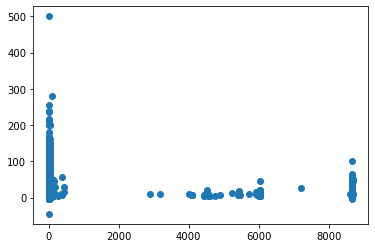

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['distance_in_km'], df['fare_amount'])
plt.show()

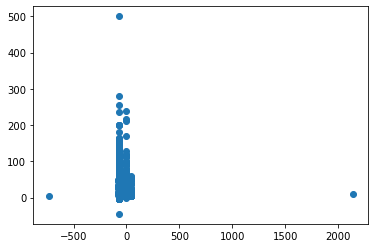

In [24]:
plt.scatter(df['pickup_longitude'], df['fare_amount'])
plt.show()

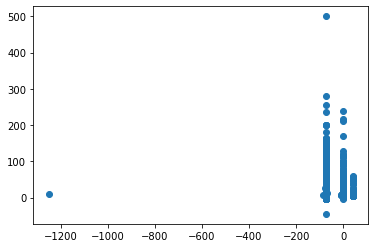

In [25]:
plt.scatter(df['dropoff_longitude'], df['fare_amount'])
plt.show()

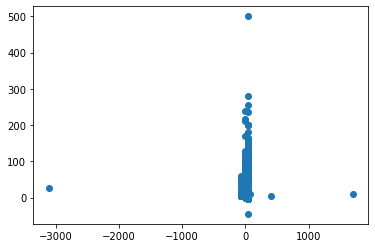

In [26]:
plt.scatter(df['pickup_latitude'], df['fare_amount'])
plt.show()

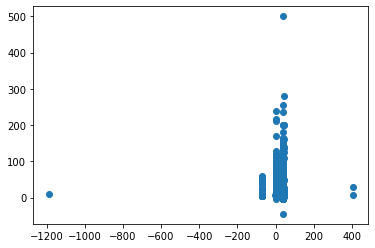

In [27]:
plt.scatter(df['dropoff_latitude'], df['fare_amount'])
plt.show()

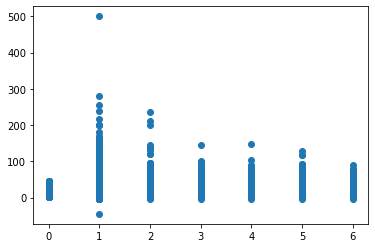

In [28]:
plt.scatter(df['passenger_count'], df['fare_amount'])
plt.show()

In [29]:
df['distance_in_km'].max(),df['distance_in_km'].min()

(8680.954459086115, 0.0)

In [30]:
df['distance_in_km'].max(),df['distance_in_km'].min()

(8680.954459086115, 0.0)

In [31]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [32]:
df = remove_outliers(df)

In [33]:
column_maxes = df.max()
df_max = column_maxes.max()
ndf = df
ndf.head

<bound method NDFrame.head of         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              4.50        -73.844311        40.721319         -73.841610   
1             16.90        -74.016048        40.711303         -73.979268   
2              5.70        -73.982738        40.761270         -73.991242   
3              7.70        -73.987130        40.733143         -73.991567   
4              5.30        -73.968095        40.768008         -73.956655   
...             ...               ...              ...                ...   
199995         8.90        -73.989939        40.729423         -73.990683   
199996        14.10        -74.005021        40.739912         -73.961319   
199997         6.90        -73.993203        40.752092         -74.003508   
199998        18.00        -73.994411        40.750884         -73.978532   
199999        42.83        -74.001656        40.730495         -73.865578   

        dropoff_latitude  passenger_count  di

In [34]:
X=np.array(ndf.drop(['fare_amount'],axis=1))
y=np.array(ndf['fare_amount'])
X=preprocessing.scale(X)
X.shape,y.shape
ndf['fare_amount'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          4.50
1         16.90
2          5.70
3          7.70
4          5.30
          ...  
199995     8.90
199996    14.10
199997     6.90
199998    18.00
199999    42.83
Name: fare_amount, Length: 195133, dtype: float64>

In [35]:
X=np.array(ndf.drop(['fare_amount'],axis=1))
y=np.array(ndf['fare_amount'])
X=preprocessing.scale(X)


In [36]:
df1=preprocessing.scale(df1)
df1.shape

(9914, 11)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
clf = LinearRegression()
clf.fit(X_train, y_train)


LinearRegression()

In [39]:
ndf.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km,Year,Month,Date,Day of Week,Hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [40]:
from sklearn.metrics import mean_squared_error

train_preds = clf.predict(X_test)
val_preds = clf.predict(df1)
train_rmse = mean_squared_error(y_test, train_preds, squared=False)
print(val_preds)
print(train_preds)
print(train_rmse) 

[10.44538645 11.32821995  5.66247187 ... 45.75656389 21.63721866
  7.83694022]
[13.3621779   9.9703148  11.15469393 ... 11.68136303  9.37138772
 15.55427084]
5.564724043040062


In [41]:
val_preds.shape

(9914,)

In [42]:
df2.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


Implemented different Regressor Models

In [43]:
def predict_and_submit(model, fname):
    test_preds = model.predict(df1)
    sub_df = pd.read_csv('sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [44]:
predict_and_submit(clf, 'linear_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.445386
1,2015-01-27 13:08:24.0000003,11.328220
2,2011-10-08 11:53:44.0000002,5.662472
3,2012-12-01 21:12:12.0000002,8.380379
4,2012-12-01 21:12:12.0000003,14.503588
...,...,...
9909,2015-05-10 12:37:51.0000002,9.384608
9910,2015-01-12 17:05:51.0000001,11.720524
9911,2015-04-19 20:44:15.0000001,45.756564
9912,2015-01-31 01:05:19.0000005,21.637219


In [45]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=7, n_estimators=50)
model2.fit(X_train, y_train)
predict_and_submit(model2, 'RandomForest_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.521857
1,2015-01-27 13:08:24.0000003,10.543515
2,2011-10-08 11:53:44.0000002,4.997142
3,2012-12-01 21:12:12.0000002,8.403040
4,2012-12-01 21:12:12.0000003,15.513969
...,...,...
9909,2015-05-10 12:37:51.0000002,8.440569
9910,2015-01-12 17:05:51.0000001,12.317466
9911,2015-04-19 20:44:15.0000001,50.970343
9912,2015-01-31 01:05:19.0000005,20.659851


In [46]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)
predict_and_submit(reg, 'GradientBoost_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.197049
1,2015-01-27 13:08:24.0000003,10.557327
2,2011-10-08 11:53:44.0000002,5.212269
3,2012-12-01 21:12:12.0000002,8.267931
4,2012-12-01 21:12:12.0000003,14.371469
...,...,...
9909,2015-05-10 12:37:51.0000002,8.670201
9910,2015-01-12 17:05:51.0000001,11.754142
9911,2015-04-19 20:44:15.0000001,53.452745
9912,2015-01-31 01:05:19.0000005,21.067017


In [47]:
from sklearn import linear_model
Bayes = linear_model.BayesianRidge()
Bayes.fit(X_train,y_train)
predict_and_submit(reg, 'Bayes_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.197049
1,2015-01-27 13:08:24.0000003,10.557327
2,2011-10-08 11:53:44.0000002,5.212269
3,2012-12-01 21:12:12.0000002,8.267931
4,2012-12-01 21:12:12.0000003,14.371469
...,...,...
9909,2015-05-10 12:37:51.0000002,8.670201
9910,2015-01-12 17:05:51.0000001,11.754142
9911,2015-04-19 20:44:15.0000001,53.452745
9912,2015-01-31 01:05:19.0000005,21.067017
